<a href="https://colab.research.google.com/github/tronghieu2810/DEEP-LEARNING/blob/main/UDM_ZTM_DL/MY_CODE/03_COMPUTER_VISION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIBRARIES

In [1]:
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.math as tfm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns
sns.set()

import pathlib
import random
import zipfile
import os

# DATA

In [2]:
def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image  = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off');

    print(f'Image shape: {img.shape}')

    return img

In [3]:
def plot_loss_curves(history):

    loss     = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy     = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    plt.figure(figsize=(20, 7))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss,      label='training_loss')
    plt.plot(epochs, val_loss,  label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy,      label='training_accuracy')
    plt.plot(epochs, val_accuracy,  label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

In [4]:
def load_and_prep_image(filename, img_shape=224):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img, size=[img_shape, img_shape])
    img = img / 255.0

    return img

In [8]:
# def pred_and_plot(model, filename, class_names=class_names):
#     img        = load_and_prep_image(filename)
#     pred       = model.predict(tf.expand_dims(img, axis=0))
#     pred_class = class_names[int(tf.round(pred))]

#     plt.imshow(img)
#     plt.title(f'Prediction: {pred_class}')
#     plt.axis(False);

# MULTICLASS

In [6]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2022-03-24 01:46:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.157.128, 142.251.8.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.157.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   195MB/s    in 2.5s    

2022-03-24 01:46:39 (195 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [7]:
import os

for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
    print(f"{len(dirnames):<3} directories - {len(filenames):<4} images <= '{dirpath}'")

2   directories - 0    images <= '10_food_classes_all_data'
10  directories - 0    images <= '10_food_classes_all_data/test'
0   directories - 250  images <= '10_food_classes_all_data/test/fried_rice'
0   directories - 250  images <= '10_food_classes_all_data/test/ramen'
0   directories - 250  images <= '10_food_classes_all_data/test/pizza'
0   directories - 250  images <= '10_food_classes_all_data/test/grilled_salmon'
0   directories - 250  images <= '10_food_classes_all_data/test/chicken_curry'
0   directories - 250  images <= '10_food_classes_all_data/test/ice_cream'
0   directories - 250  images <= '10_food_classes_all_data/test/hamburger'
0   directories - 250  images <= '10_food_classes_all_data/test/sushi'
0   directories - 250  images <= '10_food_classes_all_data/test/chicken_wings'
0   directories - 250  images <= '10_food_classes_all_data/test/steak'
10  directories - 0    images <= '10_food_classes_all_data/train'
0   directories - 750  images <= '10_food_classes_all_data/tr

In [9]:
train_dir = '10_food_classes_all_data/train/'
test_dir  = '10_food_classes_all_data/test/'

In [10]:
import pathlib
import numpy as np

data_dir    = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['5025.jpg']
Image shape: (384, 512, 3)


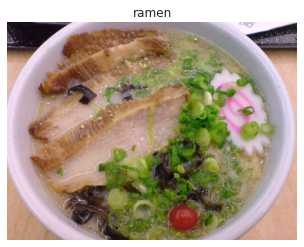

In [11]:
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))

# PREPROCESS

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen  = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')
test_data  = test_datagen .flow_from_directory(test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# MODEL

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

In [16]:
model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),                
    Activation(activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),

    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),

    Flatten(),
    Dense(10, activation='softmax')          
])

model_8.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_8 = model_8.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                        validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 65s 231ms/step - loss: 2.1129 - accuracy: 0.2321 - val_loss: 1.9648 - val_accuracy: 0.3176
Epoch 2/5
235/235 [==============================] - 55s 233ms/step - loss: 1.8636 - accuracy: 0.3639 - val_loss: 1.9480 - val_accuracy: 0.3348
Epoch 3/5
235/235 [==============================] - 56s 239ms/step - loss: 1.5587 - accuracy: 0.4801 - val_loss: 1.8604 - val_accuracy: 0.3492
Epoch 4/5
235/235 [==============================] - 55s 235ms/step - loss: 0.9742 - accuracy: 0.6916 - val_loss: 2.2204 - val_accuracy: 0.3176
Epoch 5/5
235/235 [==============================] - 58s 247ms/step - loss: 0.4249 - accuracy: 0.8700 - val_loss: 3.3329 - val_accuracy: 0.2840


In [17]:
model_8.evaluate(test_data)

79/79 [==============================] - 14s 176ms/step - loss: 3.3329 - accuracy: 0.2840


[3.3328840732574463, 0.2840000092983246]

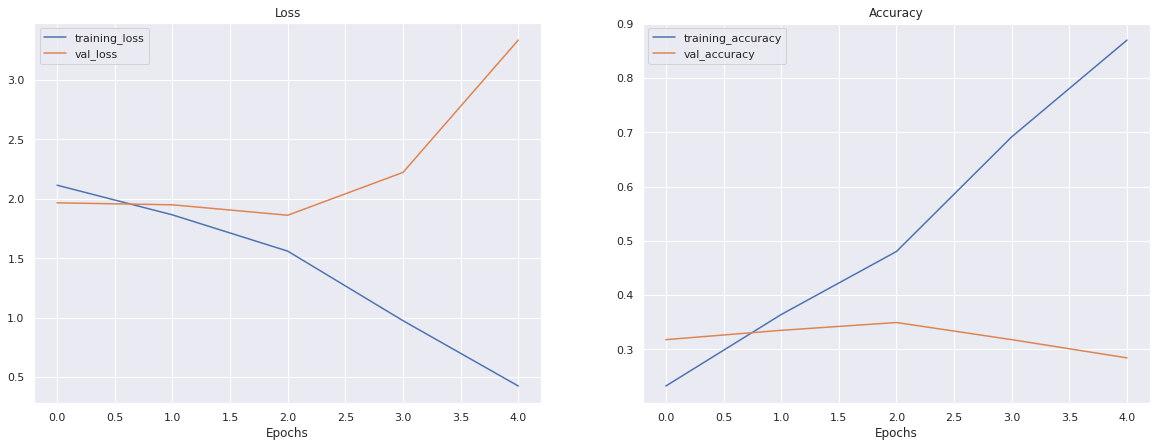

In [18]:
plot_loss_curves(history_8)

# IMPROVE

## SIMPLIFY

In [19]:
model_9 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')                      
])

model_9.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_9 = model_9.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
            validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 52s 219ms/step - loss: 2.2374 - accuracy: 0.1917 - val_loss: 2.0750 - val_accuracy: 0.2484
Epoch 2/5
235/235 [==============================] - 57s 243ms/step - loss: 1.8858 - accuracy: 0.3592 - val_loss: 2.0551 - val_accuracy: 0.2820
Epoch 3/5
235/235 [==============================] - 51s 218ms/step - loss: 1.5543 - accuracy: 0.4889 - val_loss: 2.0015 - val_accuracy: 0.3036
Epoch 4/5
235/235 [==============================] - 51s 219ms/step - loss: 1.0938 - accuracy: 0.6533 - val_loss: 2.2974 - val_accuracy: 0.2876
Epoch 5/5
235/235 [==============================] - 50s 212ms/step - loss: 0.6658 - accuracy: 0.7995 - val_loss: 2.6459 - val_accuracy: 0.2980


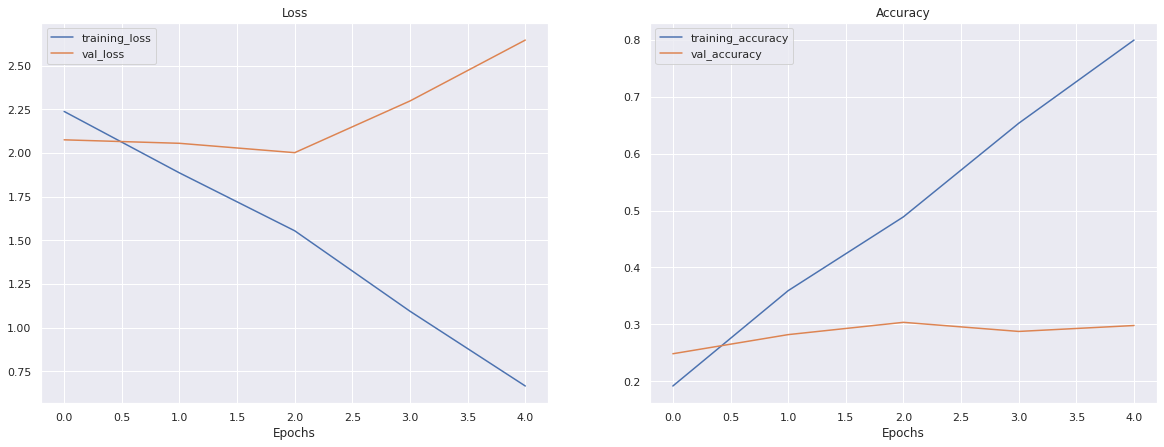

In [20]:
plot_loss_curves(history_9)

## DATA AUGMENTATION

In [22]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [24]:
model_10 = tf.keras.models.clone_model(model_8)

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data_augmented, epochs=5, steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 132s 558ms/step - loss: 2.1745 - accuracy: 0.2011 - val_loss: 1.9797 - val_accuracy: 0.3072
Epoch 2/5
235/235 [==============================] - 138s 588ms/step - loss: 2.0480 - accuracy: 0.2803 - val_loss: 1.8855 - val_accuracy: 0.3328
Epoch 3/5
235/235 [==============================] - 130s 552ms/step - loss: 1.9986 - accuracy: 0.3032 - val_loss: 1.8314 - val_accuracy: 0.3676
Epoch 4/5
235/235 [==============================] - 131s 556ms/step - loss: 1.9458 - accuracy: 0.3305 - val_loss: 1.7671 - val_accuracy: 0.3872
Epoch 5/5
235/235 [==============================] - 131s 556ms/step - loss: 1.9126 - accuracy: 0.3473 - val_loss: 1.7444 - val_accuracy: 0.4120


In [25]:
model_10.evaluate(test_data)

79/79 [==============================] - 13s 159ms/step - loss: 1.7444 - accuracy: 0.4120


[1.7443978786468506, 0.41200000047683716]

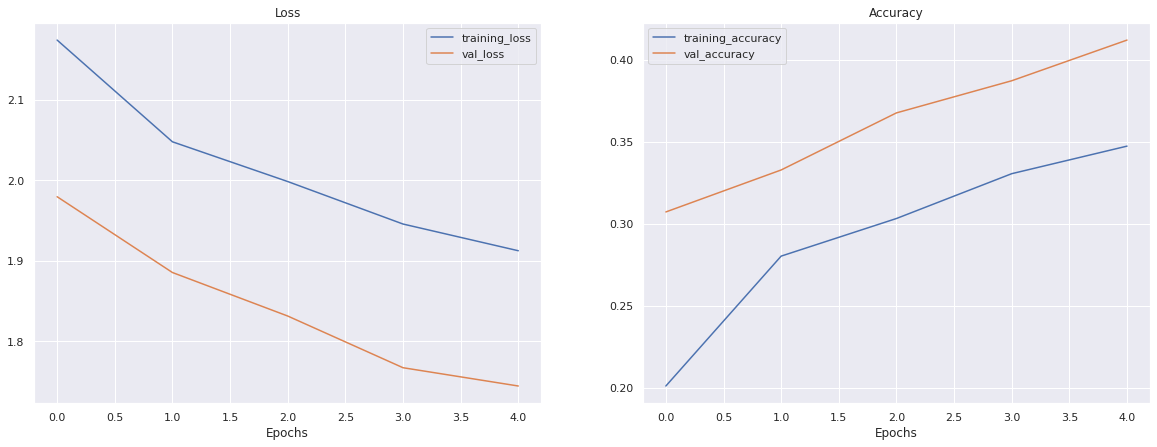

In [26]:
plot_loss_curves(history_10)

# PREDICTION